### Binomial Logistic Regression Model  

In this project, I built and evaluated a **binomial logistic regression model** using Python. This type of model is useful for predicting **binary outcomes**, making it a key tool in classification problems.  

Before starting the analysis, I imported the necessary libraries:  
- **pandas** for data manipulation  
- **scikit-learn** for model building and evaluation  
- **seaborn** for visualization  

As the project progressed, I followed step-by-step instructions to install and use any required libraries. This project highlights my ability to implement logistic regression and assess its performance.  

In [1]:
# Import pandas and seaborn packages
import pandas as pd
import seaborn as sns

## Exploratory data analysis 

In [2]:
# Load in if csv file is in the same folder as notebook
activity = pd.read_csv("activity.csv")

In [3]:
# Get summary statistics about the dataset
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [4]:
# Examine the dataset
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


## Construct binomial logistic regression model

For **binomial logistic regression**, I used the `scikit-learn` package, which is widely used for **machine learning** and **data science** applications.  

For this exercise, I specifically imported:  
- **`train_test_split()`** – to split the dataset into training and testing sets.  
- **`LogisticRegression()`** – to build and train the logistic regression model.  

These functions provided the foundation for creating and evaluating the classification model efficiently.  

In [5]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Next, I assigned the data to variables **`X`** and **`y`** to prepare it for model training.  

- **`X`**: Contains the predictor variables (features).  
- **`y`**: Contains the target variable (the binary outcome).  

To make it easier to use the **`train_test_split()`** function, I subset specific columns from the DataFrame using **double square brackets** (`[[]]`), listing the required columns inside. This step ensures the dataset is properly structured for training and evaluation.  

In [6]:
# Save X and y data into variables
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Next, I **split the data** into **training and holdout datasets** using `train_test_split()`.  

- **`test_size=0.3`**: Allocates **30%** of the data for testing.  
- **`random_state=42`**: Ensures reproducibility—changing this value would result in different splits.  

This step is crucial for evaluating the model's performance on unseen data while maintaining consistency in results.  

In [7]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Next, I built the **logistic regression classifier** and trained it using the **`.fit()`** function.  

- Created an instance of `LogisticRegression()`.  
- Used **`.fit(X_train, y_train)`** to train the model on the training data.  
- Saved the fitted model as **`clf`** for further evaluation.  

This step allows the model to learn patterns in the data and make predictions on new inputs.

In [8]:
clf = LogisticRegression().fit(X_train,y_train)

C:\Users\Aarón\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Get coefficients and visualize model

Next, I extracted the **coefficient** and **intercept** of the trained logistic regression model using the **`coef_`** and **`intercept_`** attributes of the `clf` object.  

- **`clf.coef_`**: Returns the learned coefficients for each feature.  
- **`clf.intercept_`**: Returns the intercept of the model.  

These values help interpret how each feature contributes to the model's predictions.

In [9]:
# Print the coefficient
clf.coef_

array([[-0.1177471]])

In [10]:
# Print the intercept
clf.intercept_

array([6.10180958])

Based on the model's results:  

- **Intercept** (**β₀**) = **6.10**  
- **Coefficient** (**β₁**) = **-0.12**  

To visualize the model, I used **`seaborn.regplot()`** to plot the data along with a **95% confidence band**. Since this is a **logistic regression model**, I set **`logistic=True`** to ensure the function applies the correct transformation instead of treating it as a linear regression.  

This visualization helps illustrate how the model predicts the probability of the target variable based on the input features.

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

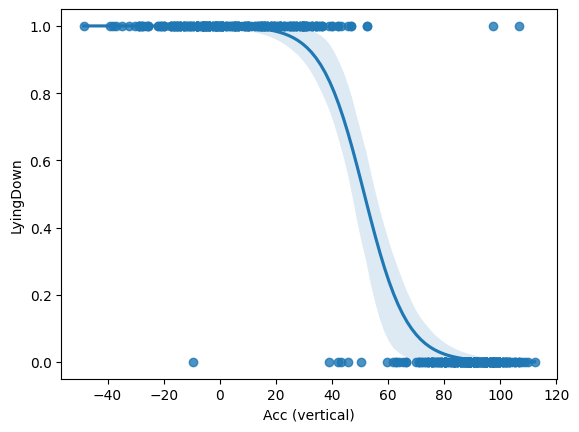

In [11]:
# Plot the logistic regression and its confidence band
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

# Confusion matrix

### Evaluating the Model with a Confusion Matrix  

This section focuses on **confusion matrices**, a key tool for evaluating **classification models**, including **binomial logistic regression**.  

The confusion matrix provides insights into the model’s performance by showing the number of:  
- **True Positives (TP)** – Correct positive predictions  
- **True Negatives (TN)** – Correct negative predictions  
- **False Positives (FP)** – Incorrect positive predictions  
- **False Negatives (FN)** – Incorrect negative predictions  

**Note:** This analysis assumes that all previous code has been executed, and necessary **variables and packages** are already loaded.

## Construct logistic regression model

Once again, I **split the data** (`X` and `y`) into **training and holdout datasets** using the `train_test_split()` function, which was previously imported from `scikit-learn`.  

Then, I:  
- **Built the logistic regression model** using `LogisticRegression()` and trained it with `.fit()`.  
- **Made predictions** on the holdout sample (`X_test`) using the `.predict()` function.  

This step allows me to compare the model's predictions against actual values to assess its performance.

In [12]:
# Split data into training and holdout samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build regression model
clf = LogisticRegression().fit(X_train,y_train)

# Save predictions
y_pred = clf.predict(X_test)

C:\Users\Aarón\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


To view the model's predictions, I printed the output of **`clf.predict(X_test)`**.  

- **`0`** → Represents "not lying down"  
- **`1`** → Represents "lying down"  

This step helps verify the classification results and ensures the model correctly predicts the binary outcomes.

In [13]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

However, instead of directly predicting labels, the model **calculates probabilities** that a given value of **X** corresponds to the person **lying down**.  

To view these probabilities, I printed the output of **`clf.predict_proba(X_test)`**, which returns the probability for each class.  

In [15]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

## Create confusion matrix



### Creating a Confusion Matrix  

To evaluate the model’s classification accuracy, I created a **confusion matrix**, which visually represents how well the classifier predicts categorical labels.  

For this, I used the [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function from `scikit-learn.metrics`, which requires:  
- **`y_test`** → The actual labels of the holdout sample.  
- **`y_pred`** → The predicted labels of the holdout sample.  
- **`clf.classes_`** → The class labels (0 and 1 in this case, since it’s a binomial logistic regression).  

Since this is a **binary classification problem**, the confusion matrix only contains two labels:  
- **0** (not lying down)  
- **1** (lying down)  

This matrix provides insights into the model’s **true positives, true negatives, false positives, and false negatives**, helping assess its overall performance.  

In [16]:
# Import the metrics module from scikit-learn
import sklearn.metrics as metrics

In [17]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)

In [18]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)

### Understanding the Confusion Matrix  

To interpret the confusion matrix, it's important to understand the meaning of each quadrant:  

- **Upper-left (True Negatives - TN)**: Correctly predicted **not lying down**.  
- **Bottom-left (False Negatives - FN)**: Incorrectly predicted **not lying down** when the person **was** lying down.  
- **Upper-right (False Positives - FP)**: Incorrectly predicted **lying down** when the person **was not**.  
- **Bottom-right (True Positives - TP)**: Correctly predicted **lying down**.  

#### In this context:  
- **True Negatives (TN)** → The model correctly predicted that a person was **not lying down**.  
- **False Negatives (FN)** → The model incorrectly predicted that a lying person was **not lying down**.  
- **False Positives (FP)** → The model incorrectly predicted that a person was **lying down** when they were not.  
- **True Positives (TP)** → The model correctly predicted that a person was **lying down**.  

A **perfect model** would have only **true positives and true negatives**, with **zero false positives or false negatives**. This confusion matrix helps evaluate the model’s classification accuracy and areas for improvement.

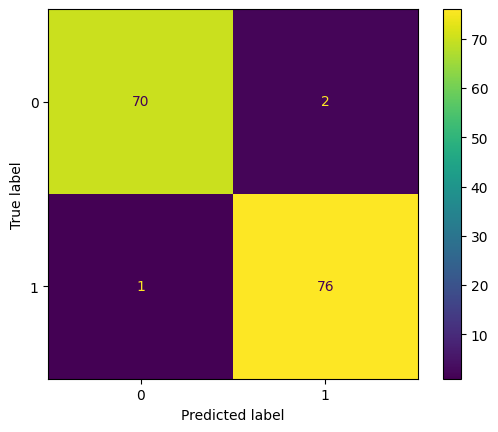

In [19]:
# Display the confusion matrix
disp.plot()

### Closing Thoughts  

This project demonstrated how to **build, evaluate, and interpret** a **binomial logistic regression model** using Python. By splitting the dataset, training the model, and making predictions, I applied key classification techniques to analyze a binary outcome.  

The **confusion matrix** provided valuable insights into the model’s accuracy, showing the balance between **true positives, true negatives, false positives, and false negatives**. While a perfect model would have no misclassifications, this evaluation highlights areas for potential improvement, such as adjusting thresholds or feature selection.  

Overall, this project showcases my ability to implement **logistic regression**, interpret model outputs, and assess classification performance—key skills for data analysis and machine learning.  